# <span style="color:#bce35b;font-size:35px"><b>Week 9 & 10</b></span>
<!-- # <span style="color:#bce35b;font-size:35px">Title<b>Title</b></span> -->
<!-- # <span style="color:#bce35b">H1</span> -->
<!-- ## <span style="color:#ae8bd5">H2</span> -->
<!-- ### <span style="color:#9c4957">H3</span> -->
<!-- #### <span style="color:white">H4</span> -->

<span style="color:#8c8c8c">Patrick Weatherford</span>

[Green]: <> (#bce35b)
[Purple]: <> (#ae8bd5)
[Coral]: <> (#9c4957)
[Grey]: <> (#8c8c8c)

***
***

Importing libraries

In [122]:
from datetime import date, datetime as dttm, timedelta
from pprint import pprint
from contextlib import closing
from dask import dataframe as dd, bag as db, array as da
import datetime as dt
import sqlite3
from fuzzywuzzy import fuzz, process
import lxml
from bs4 import BeautifulSoup
import sys
import scipy
import io
import math
import re
from itertools import permutations, dropwhile, zip_longest
from collections import deque as deq
import requests
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import os
import keyring
from http import HTTPStatus
import lxml
import API_Keys
from IPython.display import Image


os.environ['KAGGLE_USERNAME'] = 'hakunapatata'
os.environ['KAGGLE_KEY'] = keyring.get_password(
    service_name='kaggle_api', username=os.environ['KAGGLE_USERNAME'])


%matplotlib inline

# matplotlib default settings
plt.style.use('dark_background')
mpl.rcParams.update({'lines.linewidth': 3})
mpl.rcParams.update({'axes.labelsize': 14})
mpl.rcParams.update({'axes.titlesize': 16})
mpl.rcParams.update({'axes.titleweight': 'bold'})
mpl.rcParams.update({'figure.autolayout': True})
mpl.rcParams.update(
    {'axes.grid': True, 'grid.color': '#424242', 'grid.linestyle': '--'})

# creation random number generator object
rng_seed = 777
rng = np.random.default_rng(rng_seed)

# pandas dataframe options
pd.set_option('display.max_columns', None)


In [2]:
# see list of current settings
# plt.rcParams.keys()


<br>

Import custom module <br><br>
<span style="font-size:13px">~/Bellevue_University/Python/HakunaPatata.py</span>

In [2]:

rel_path_parts = os.getcwd().split(os.sep)
rel_path = ''

for count, dir in enumerate(rel_path_parts):
    if count == 0:
        rel_path = rel_path + f"{dir}"
    else:
        rel_path = rel_path + f"\\{dir}"

    if dir == "Bellevue_University":
        break
    else:
        continue

custom_mod_path = rel_path + f"\\Python"
class_path = rel_path + f"\\DSC 540 - Data Preparation"

os.chdir(custom_mod_path)  # change cwd to directory with custom Python module (~/Bellevue_University/Python/HakunaPatata.py)

import HakunaPatata as HP

os.chdir(class_path)  # once imported, change back to class working directory.

<br>

***

# <span style="color:#bce35b">Week Activities</span>
<!-- # <span style="color:#bce35b;font-size:35px">Title<b>Title</b></span> -->
<!-- # <span style="color:#bce35b">H1</span> -->
<!-- ## <span style="color:#ae8bd5">H2</span> -->
<!-- ### <span style="color:#9c4957">H3</span> -->
<!-- #### <span style="color:white">H4</span> -->

<!-- <span style="color:#8c8c8c">Patrick Weatherford</span> -->

[Green]: <> (#bce35b)
[Purple]: <> (#ae8bd5)
[Coral]: <> (#9c4957)
[Grey]: <> (#8c8c8c)

<br>

***

## <span style="color:#ae8bd5">Activity 9</span>
<!-- # <span style="color:#bce35b;font-size:35px">Title<b>Title</b></span> -->
<!-- # <span style="color:#bce35b">H1</span> -->
<!-- ## <span style="color:#ae8bd5">H2</span> -->
<!-- ### <span style="color:#9c4957">H3</span> -->
<!-- #### <span style="color:white">H4</span> -->

<!-- <span style="color:#8c8c8c">Patrick Weatherford</span> -->

[Green]: <> (#bce35b)
[Purple]: <> (#ae8bd5)
[Coral]: <> (#9c4957)
[Grey]: <> (#8c8c8c)

Top 100 eBooks from Gutenberg (last 30 days)

In [9]:
url = r'https://www.gutenberg.org/browse/scores/top'

s = requests.Session()
r = s.get(url, timeout=10)

print(f"Connection status: {HTTPStatus(r.status_code).phrase}")

Connection status: OK


<br>

Looks like I need to pull all of the list elements under the h2 (header#2) tag where the id for the h2 tag is 'books-last1'. Then get the child \<li> tags for the parent \<ol> tag which is a sibling to the \<h2> tag.

In [121]:
soup = BeautifulSoup(r.text, 'lxml')

top100_yesterday_li = soup.find('h2', id="books-last1").find_next_sibling('ol').find_all('li')

top100_yesterday = []

for rank, li in enumerate(top100_yesterday_li, start=1):
    book_num = re.search(r'\d+', li.a.get('href')).group()
    book_name = re.sub(r'\(\d+\)', '', li.a.text)
    book_link = f"https://www.gutenberg.org/ebooks/{book_num}"
    top100_yesterday.append( (rank, book_num, book_name, book_link) )

top_100_yesterday_df = pd.DataFrame(top100_yesterday, columns=['RANK','BOOK_NUM','BOOK_NAME','BOOK_LINK'], ).set_index('RANK')

top_100_yesterday_df


,BOOK_NUM,BOOK_NAME,BOOK_LINK
RANK,,,
1,11,Alice's Adventures in Wonderland by Lewis Carr...,https://www.gutenberg.org/ebooks/11
2,33044,Birds from North Borneo by Max C. Thompson,https://www.gutenberg.org/ebooks/33044
3,84,"Frankenstein; Or, The Modern Prometheus by Mar...",https://www.gutenberg.org/ebooks/84
4,1342,Pride and Prejudice by Jane Austen,https://www.gutenberg.org/ebooks/1342
5,64317,The Great Gatsby by F. Scott Fitzgerald,https://www.gutenberg.org/ebooks/64317
...,...,...,...
96,766,David Copperfield by Charles Dickens,https://www.gutenberg.org/ebooks/766
97,61,The Communist Manifesto by Friedrich Engels an...,https://www.gutenberg.org/ebooks/61
98,7142,The History of the Peloponnesian War by Thucyd...,https://www.gutenberg.org/ebooks/7142


<br>

***

## <span style="color:#ae8bd5">Activity 10</span>
<!-- # <span style="color:#bce35b;font-size:35px">Title<b>Title</b></span> -->
<!-- # <span style="color:#bce35b">H1</span> -->
<!-- ## <span style="color:#ae8bd5">H2</span> -->
<!-- ### <span style="color:#9c4957">H3</span> -->
<!-- #### <span style="color:white">H4</span> -->

<!-- <span style="color:#8c8c8c">Patrick Weatherford</span> -->

[Green]: <> (#bce35b)
[Purple]: <> (#ae8bd5)
[Coral]: <> (#9c4957)
[Grey]: <> (#8c8c8c)

Building Movie Database API

In [232]:
def search_movie(api_key, movie_title, media_type='movie', plot_output='short', year=None):
    
    url = f"http://www.omdbapi.com/"

    payload = {
        'apikey':api_key
        ,'t':f"{movie_title}"
        ,'type':media_type
        ,'plot':plot_output
        ,'y':year
    }

    s = requests.Session()
    r = s.get(url, timeout=10, params=payload)

    print(f"Connection status: {HTTPStatus(r.status_code).phrase}")

    json_dict = r.json()

    for k in json_dict.keys():
        if k.upper() == 'RATINGS':
            print(f"{k.upper()}")
            for rating in json_dict[k]:
                print(f"\t- {rating['Source']}: {rating['Value']}")
            print(f"")
        else:
            print(f"{k.upper()}: {json_dict[k]}")

    

In [233]:
search_movie(api_key=API_Keys.OMDb_api_key, movie_title='Napoleon Dynamite')

Connection status: OK
TITLE: Napoleon Dynamite
YEAR: 2004
RATED: PG
RELEASED: 27 Aug 2004
RUNTIME: 96 min
GENRE: Comedy
DIRECTOR: Jared Hess
WRITER: Jared Hess, Jerusha Hess
ACTORS: Jon Heder, Efren Ramirez, Jon Gries
PLOT: A listless and alienated teenager decides to help his new friend win the class presidency in their small western high school, while he must deal with his bizarre family life back home.
LANGUAGE: English
COUNTRY: United States
AWARDS: 10 wins & 23 nominations
POSTER: https://m.media-amazon.com/images/M/MV5BNjYwNTA3MDIyMl5BMl5BanBnXkFtZTYwMjIxNjA3._V1_SX300.jpg
RATINGS
	- Internet Movie Database: 6.9/10
	- Rotten Tomatoes: 72%
	- Metacritic: 64/100

METASCORE: 64
IMDBRATING: 6.9
IMDBVOTES: 213,840
IMDBID: tt0374900
TYPE: movie
DVD: 21 Dec 2004
BOXOFFICE: $44,540,956
PRODUCTION: N/A
WEBSITE: N/A
RESPONSE: True


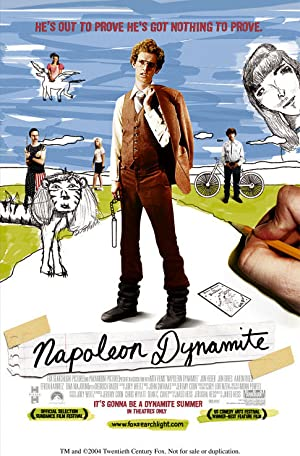

In [234]:
## poster from get response
poster_url = r.json()['Poster']

Image(poster_url)

<br>

***

## <span style="color:#ae8bd5">Connect to the Twitter API</span>
<!-- # <span style="color:#bce35b;font-size:35px">Title<b>Title</b></span> -->
<!-- # <span style="color:#bce35b">H1</span> -->
<!-- ## <span style="color:#ae8bd5">H2</span> -->
<!-- ### <span style="color:#9c4957">H3</span> -->
<!-- #### <span style="color:white">H4</span> -->

<!-- <span style="color:#8c8c8c">Patrick Weatherford</span> -->

[Green]: <> (#bce35b)
[Purple]: <> (#ae8bd5)
[Coral]: <> (#9c4957)
[Grey]: <> (#8c8c8c)

<br>

***

## <span style="color:#ae8bd5">Metropolitan Museum Visualizations</span>
<!-- # <span style="color:#bce35b;font-size:35px">Title<b>Title</b></span> -->
<!-- # <span style="color:#bce35b">H1</span> -->
<!-- ## <span style="color:#ae8bd5">H2</span> -->
<!-- ### <span style="color:#9c4957">H3</span> -->
<!-- #### <span style="color:white">H4</span> -->

<!-- <span style="color:#8c8c8c">Patrick Weatherford</span> -->

[Green]: <> (#bce35b)
[Purple]: <> (#ae8bd5)
[Coral]: <> (#9c4957)
[Grey]: <> (#8c8c8c)